In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_superv_stc import Parser

In [3]:
# Coastal Endurance Washington Offshore Profiler Mooring supervisor data from the syslog
baseurl = "https://rawdata.oceanobservatories.org/files/CE09OSPM/D00006/syslog/"
fname = "20161013.syslog.log"

# initialize the Parser object for the supervisor
superv = Parser(baseurl + fname)
r = requests.get(superv.infile, verify=True) # use verify=False for expired certificate

In [4]:
superv.raw = r.content.decode('utf-8').splitlines()
len(superv.raw), superv.raw[:5]

(1970,
 ['2016/10/13 01:33:38.437 MSG C_STATUS bin/status v0.2-20141106 compiled on Aug 25 2016 22:08:01: Starting',
  '2016/10/13 01:33:38.617 MSG D_STATUS bin/status v0.2-20141106 compiled on Aug 25 2016 22:08:01: Starting',
  '2016/10/13 01:33:39.376 MSG C_GPS bin/gps_sys v0.2-20110320 compiled on Aug 25 2016 22:08:59: Starting',
  '2016/10/13 01:33:39.387 ALM C_STATUS Clearing alarms for c_gps',
  '2016/10/13 01:33:40.021 MSG C_GPS set_sys_clock: system time ok [gps date=131016 time=013339]'])

In [5]:
superv.parse_data()
superv.data.keys()

dict_keys(['error_flags1', 'port5_error_flag', 'port2_current', 'port7_voltage', 'port3_voltage', 'humidity', 'pps_source', 'wake_code', 'port1_power_state', 'port3_error_flag', 'iridium_power_state', 'fwwf_power_flag', 'heartbeat_threshold', 'heartbeat_enable', 'iridium_voltage', 'temperature2', 'port7_current', 'stc_date_time_string', 'wake_power_count', 'port7_power_state', 'port2_error_flag', 'gps_power_state', 'port7_error_flag', 'leak_detect_voltage1', 'ground_fault_sbd', 'iridium_current', 'wake_time_count', 'ground_fault_main', 'ground_fault_enable', 'heartbeat_delta', 'ground_fault_9522_fw', 'port5_voltage', 'imm_power_state', 'port1_error_flag', 'fwwf_current', 'port3_power_state', 'main_voltage', 'leak_detect_enable', 'port2_voltage', 'port1_voltage', 'port3_current', 'error_flags2', 'sbd_message_pending', 'fwwf_voltage', 'dsl_power_state', 'ground_fault_gps', 'sbd_power_state', 'port5_current', 'temperature1', 'iridium_error_flag', 'port2_power_state', 'leak_detect_voltage2

In [6]:
superv.data.time[:5]

[1476322717.975,
 1476322718.577,
 1476323018.739,
 1476323020.744,
 1476323319.972]

In [7]:
df = pd.DataFrame(superv.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [8]:
df.shape, df.columns

((132, 60),
 Index(['dsl_power_state', 'error_flags1', 'error_flags2', 'esw_power_state',
        'fwwf_current', 'fwwf_power_flag', 'fwwf_power_state', 'fwwf_voltage',
        'gps_power_state', 'ground_fault_9522_fw', 'ground_fault_enable',
        'ground_fault_gps', 'ground_fault_main', 'ground_fault_sbd',
        'heartbeat_delta', 'heartbeat_enable', 'heartbeat_threshold',
        'humidity', 'imm_power_state', 'iridium_current', 'iridium_error_flag',
        'iridium_power_state', 'iridium_voltage', 'leak_detect_enable',
        'leak_detect_voltage1', 'leak_detect_voltage2', 'main_current',
        'main_voltage', 'port1_current', 'port1_error_flag',
        'port1_power_state', 'port1_voltage', 'port2_current',
        'port2_error_flag', 'port2_power_state', 'port2_voltage',
        'port3_current', 'port3_error_flag', 'port3_power_state',
        'port3_voltage', 'port5_current', 'port5_error_flag',
        'port5_power_state', 'port5_voltage', 'port7_current',
        'port

In [9]:
df.dtypes

dsl_power_state                  int64
error_flags1                    object
error_flags2                    object
esw_power_state                  int64
fwwf_current                   float64
fwwf_power_flag                  int64
fwwf_power_state                 int64
fwwf_voltage                   float64
gps_power_state                float64
ground_fault_9522_fw           float64
ground_fault_enable              int64
ground_fault_gps               float64
ground_fault_main              float64
ground_fault_sbd               float64
heartbeat_delta                  int64
heartbeat_enable                 int64
heartbeat_threshold              int64
humidity                       float64
imm_power_state                float64
iridium_current                float64
iridium_error_flag               int64
iridium_power_state              int64
iridium_voltage                float64
leak_detect_enable               int64
leak_detect_voltage1             int64
leak_detect_voltage2     

In [10]:
df.tail(5)

dsl_power_state error_flags1 error_flags2  \
dt_utc                                                               
2016-10-13 19:35:07.639                0     00000000     00000000   
2016-10-13 19:39:40.112                0     00000000     00000000   
2016-10-13 19:40:09.816                0     00000000     00000000   
2016-10-13 19:44:40.734                0     00000000     00000000   
2016-10-13 19:45:12.082                0     00000000     00000000   

                         esw_power_state  fwwf_current  fwwf_power_flag  \
dt_utc                                                                    
2016-10-13 19:35:07.639                0         332.4                0   
2016-10-13 19:39:40.112                0         334.8                0   
2016-10-13 19:40:09.816                0         332.4                0   
2016-10-13 19:44:40.734                0         332.4                0   
2016-10-13 19:45:12.082                0         334.8                0   

                         fwwf_power_state  fwwf_voltage  gps_power_state  \
dt_utc                                                                     
2016-10-13 19:35:07.639                 3          12.0              1.0   
2016-10-13 19:39:40.112                 3          12.0              1.0   
2016-10-13 19:40:09.816                 3          12.0              1.0   
2016-10-13 19:44:40.734                 3          12.0              1.0   
2016-10-13 19:45:12.082                 3          12.0              1.0   

                         ground_fault_9522_fw           ...            \
dt_utc                                                  ...             
2016-10-13 19:35:07.639                   2.0           ...             
2016-10-13 19:39:40.112                   2.0           ...             
2016-10-13 19:40:09.816                   2.0           ...             
2016-10-13 19:44:40.734                   2.0           ...             
2016-10-13 19:45:12.082                   2.0           ...             

                         sbd_message_pending  sbd_power_state  \
dt_utc                                                          
2016-10-13 19:35:07.639                  0.0              1.0   
2016-10-13 19:39:40.112                  0.0              0.0   
2016-10-13 19:40:09.816                  0.0              0.0   
2016-10-13 19:44:40.734                  0.0              0.0   
2016-10-13 19:45:12.082                  0.0              0.0   

                            stc_date_time_string  temperature1  temperature2  \
dt_utc                                                                         
2016-10-13 19:35:07.639  2016/10/13 19:35:07.639          23.4          21.9   
2016-10-13 19:39:40.112  2016/10/13 19:39:40.112          23.4          21.9   
2016-10-13 19:40:09.816  2016/10/13 19:40:09.816          23.4          21.9   
2016-10-13 19:44:40.734  2016/10/13 19:44:40.734          23.5          21.9   
2016-10-13 19:45:12.082  2016/10/13 19:45:12.082          23.5          21.9   

                                 time  wake_code  wake_power_count  \
dt_utc                                                               
2016-10-13 19:35:07.639  1.476387e+09         40                78   
2016-10-13 19:39:40.112  1.476388e+09         40                78   
2016-10-13 19:40:09.816  1.476388e+09         40                78   
2016-10-13 19:44:40.734  1.476388e+09         40                78   
2016-10-13 19:45:12.082  1.476388e+09         40                78   

                         wake_time_count                  dt_utc  
dt_utc                                                            
2016-10-13 19:35:07.639              0.0 2016-10-13 19:35:07.639  
2016-10-13 19:39:40.112              0.0 2016-10-13 19:39:40.112  
2016-10-13 19:40:09.816              0.0 2016-10-13 19:40:09.816  
2016-10-13 19:44:40.734              0.0 2016-10-13 19:44:40.734  
2016-10-13 19:45:12.082              0.0 2016-10-13 1

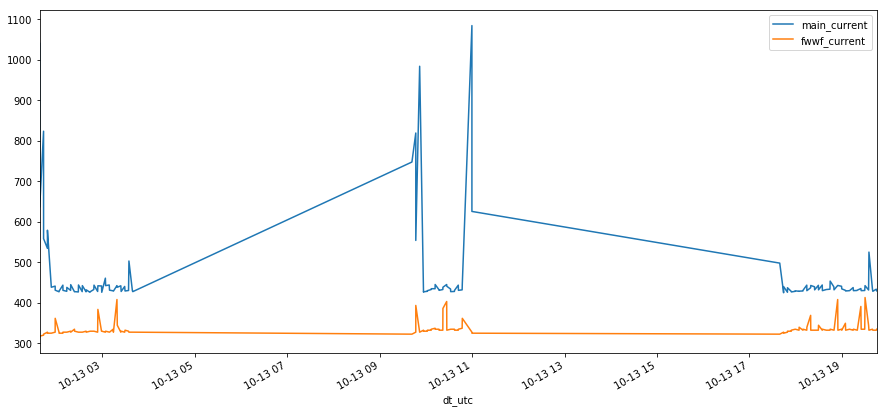

In [14]:
df[['main_current','fwwf_current']].plot(figsize=(15,7));